## Clustering stocks using KMeans

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day).  You are given a NumPy array `movements` of daily price movements from 2010 to 2015, where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others.  To account for this, include a `Normalizer` at the beginning of your pipeline.  The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

# Normalizer vs StandardScaler
Note that `Normalizer()` is different to `StandardScaler()`, which you used in the previous exercise. While `StandardScaler()` standardizes **features** (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, `Normalizer()` rescales **each sample** - here, each company's stock price - independently of the other.

This dataset was obtained from the Yahoo! Finance API.

In [12]:
import pandas as pd
import numpy as np

## 1. Load the data  (written for you)

In [13]:
path = 'https://raw.githubusercontent.com/frandiego/data/master/stocks.csv'
df = pd.read_csv(path, index_col='company')

## 2. Inspect the first few rows of the DataFrame `stocks_df` by calling its `head()` function. (written for you)

In [14]:
df.head()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,2010-01-19,2010-01-20,2010-01-21,2010-01-22,2010-01-25,2010-01-26,2010-01-27,2010-01-28,2010-01-29,2010-02-01,2010-02-02,2010-02-03,2010-02-04,2010-02-05,2010-02-08,2010-02-09,2010-02-10,2010-02-11,2010-02-12,2010-02-16,2010-02-17,2010-02-18,2010-02-19,2010-02-22,2010-02-23,2010-02-24,2010-02-25,2010-02-26,2010-03-01,2010-03-02,...,2013-09-04,2013-09-05,2013-09-06,2013-09-09,2013-09-10,2013-09-11,2013-09-12,2013-09-13,2013-09-16,2013-09-17,2013-09-18,2013-09-19,2013-09-20,2013-09-23,2013-09-24,2013-09-25,2013-09-26,2013-09-27,2013-09-30,2013-10-01,2013-10-02,2013-10-03,2013-10-04,2013-10-07,2013-10-08,2013-10-09,2013-10-10,2013-10-11,2013-10-14,2013-10-15,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
company,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,6.709993,-3.180006,-4.009998,-9.030006,0.560000,-0.010000,1.030010,-5.640009,-9.019993,2.360001,-0.050001,4.060000,-4.680000,2.829998,-1.570009,-0.229992,-0.769990,3.789993,2.269998,1.459994,-1.639998,1.300003,-0.190005,-1.920004,-2.940000,2.430002,4.619999,2.239998,3.240008,-1.079998,...,-0.869980,-4.980034,-0.219979,1.169960,-11.559998,0.699989,4.190003,-4.439995,-10.879982,7.360008,1.500008,1.599983,-10.589988,-5.459991,-5.779999,-7.669976,0.219979,-1.029983,-0.500038,9.510018,3.929970,-7.100029,-0.829979,1.190040,-9.000045,1.950005,-1.679985,5.820000,6.209969,1.169960,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,0.200001,-0.100000,-0.460001,-1.190001,-0.650000,-1.300001,0.430000,-1.690000,-0.300001,-0.420000,-0.020001,-0.099998,-0.940001,-0.090000,-0.250000,0.760000,3.710001,-0.200001,1.000000,0.000000,-0.630001,0.299999,-0.010000,1.540001,-1.459999,0.830000,0.069999,-0.900000,-2.179998,-0.899999,...,0.680000,0.229999,-0.720002,0.829998,-0.130001,0.340000,-0.620003,0.320000,-0.470001,0.790001,0.279999,-0.930000,-0.020000,-0.439998,0.100003,0.190003,-0.239998,-0.029998,0.020000,0.579998,0.350002,-0.210003,0.660000,-0.310001,-1.099998,0.050000,1.290001,0.330002,0.599999,-0.160000,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,1.300003,-1.349998,-0.639999,-4.169998,-1.790000,-1.079995,1.720001,1.599999,-4.360000,-4.309997,-0.669998,1.979995,-2.699997,1.510002,-2.549995,-0.169998,-0.639999,2.879997,0.670006,-2.529999,-0.760002,2.240006,-0.390007,0.639999,-0.770004,1.760002,0.029999,0.520005,5.840004,0.519997,...,5.310028,0.470001,0.529998,2.489990,-0.190003,0.730011,-0.530030,-2.220002,-3.760009,6.540008,7.970001,-1.709991,3.799987,-2.520020,1.700012,-1.880005,4.220001,-0.910003,-0.769989,6.730011,2.470001,-5.630005,3.910004,-5.209991,-8.269989,-5.190002,0.540008,6.120026,1.480011,-3.470001,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,0.719997,0.050000,-0.830002,-2.770001,-1.309997,0.559997,0.709999,-1.239998,0.060002,0.369999,0.340000,-0.579998,-0.500000,0.189998,-0.969997,0.270001,0.169998,0.480000,0.629997,0.809998,-0.480000,0.080002,0.170002,-0.169998,-0.810002,0.310002,0.370003,0.039997,-0.070000,0.270000,...,0.620002,0.639999,-0.570000,0.070008,0.379997,0.480003,0.000000,-0.279999,-0.739998,1.320000,0.650001,-0.239998,-0.300003,-0.849999,-0.319999,-0.139999,0.320000,-0.169999,0.549996,0.290001,-0.549995,-0.090004,0.430001,-0.559998,-0.809998,-0.159996,1.470002,0.730004,0.739998,-0.379997,0.680001,2.290001,0.409996

## 3. Extract the NumPy array `movements` from the DataFrame and the list of company names (_written for you_)

In [15]:
companies = list(df.index)
movements = df.values

## 4. Make the necessary imports:

- `Normalizer` from `sklearn.preprocessing`.
- `KMeans` from `sklearn.cluster`.
- `make_pipeline` from `sklearn.pipeline`.

In [16]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

## 5. Create an instance of `Normalizer` called `normalizer`.

In [17]:
normalizer = Normalizer()

In [18]:
mvtr = normalizer.fit_transform(movements)

## 6. Create an instance of `KMeans` called `kmeans` with `10` clusters.

In [19]:
kmeans = KMeans(n_clusters=10)

##  7. Using `make_pipeline()`, create a pipeline called `pipeline` that chains `normalizer` and `kmeans`. Please read this [link](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

In [21]:
pipeline = make_pipeline(normalizer, kmeans)

## 8. Fit the pipeline to the `movements` array.

In [22]:
pipeline.fit(movements)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

## 9.  Use the `.predict()` method of the pipeline to predict the labels for `movements`.

In [23]:
labels = kmeans.fit_predict(mvtr)

In [24]:
labels

array([7, 0, 5, 0, 8, 0, 4, 3, 8, 9, 1, 7, 1, 8, 7, 0, 0, 5, 0, 4, 8, 3,
       7, 8, 7, 8, 0, 9, 6, 2, 8, 6, 8, 7, 3, 8, 2, 4, 6, 1, 9, 6, 4, 4,
       1, 3, 4, 8, 3, 4, 8, 8, 4, 1, 4, 0, 6, 1, 8, 5], dtype=int32)

## 10. Align the cluster labels with the list of company names `companies` by creating a DataFrame `result` with `labels` and `companies` as columns.

In [25]:
result = pd.DataFrame({'labels': labels, 'companies': companies})

## 11. Now display the DataFrame, sorted by cluster label.  To do this, use the `.sort_values()` method of `result` to sort the DataFrame by the `'labels'` column.

In [26]:
for i in result.labels.unique():
    print(i)
    print(result.loc[result.labels == i,'companies'])
    print('')

7
0         Apple
11        Cisco
14         Dell
22           HP
24        Intel
33    Microsoft
Name: companies, dtype: object

0
1                   AIG
3      American express
5       Bank of America
15                 Ford
16    General Electrics
18        Goldman Sachs
26       JPMorgan Chase
55          Wells Fargo
Name: companies, dtype: object

5
2              Amazon
17    Google/Alphabet
59              Yahoo
Name: companies, dtype: object

8
4                                 Boeing
8                            Caterpillar
13                     DuPont de Nemours
20                            Home Depot
23                                   IBM
25                     Johnson & Johnson
30                            MasterCard
32                                    3M
35                              Navistar
47                              Symantec
50    Taiwan Semiconductor Manufacturing
51                     Texas instruments
58                                 Xerox
Name: com

In [27]:
result.sort_values('labels').head()

,labels,companies
18,0,Goldman Sachs
1,0,AIG
15,0,Ford
3,0,American express
55,0,Wells Fargo


In [28]:
dftr = normalizer.fit_transform(df)

In [29]:
dftr = pd.DataFrame(dftr)

In [30]:
dftr.index = df.index

In [31]:
dftr.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962
company,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apple,0.003021,-0.001146,-0.017759,-0.006093,0.008749,-0.014009,-0.007655,0.014478,-0.003541,-0.026039,0.034944,-0.016561,-0.020883,-0.047026,0.002916,-0.000052,0.005364,-0.029372,-0.046974,0.012290,-0.000260,0.021144,-0.024372,0.014738,-0.008176,-0.001198,-0.004010,0.019737,0.011822,0.007603,-0.008541,0.006770,-0.000990,-0.009999,-0.015311,0.012655,0.024060,0.011665,0.016873,-0.005624,...,-0.004531,-0.025935,-0.001146,0.006093,-0.060202,0.003645,0.021821,-0.023123,-0.056661,0.038329,0.007812,0.008332,-0.055150,-0.028434,-0.030101,-0.039944,0.001146,-0.005364,-0.002604,0.049526,0.020466,-0.036975,-0.004322,0.006197,-0.046870,0.010155,-0.008749,0.030309,0.032340,0.006093,0.001667,0.023539,0.015102,0.049943,-0.034059,0.031038,0.035986,-0.027913,0.004375,-0.102020
AIG,-0.025994,-0.026400,-0.008529,-0.017058,0.028837,-0.008123,-0.045895,0.002843,-0.004874,-0.020308,0.008123,-0.004062,-0.018683,-0.048332,-0.026400,-0.052800,0.017465,-0.068640,-0.012185,-0.017058,-0.000812,-0.004061,-0.038178,-0.003655,-0.010154,0.030868,0.150683,-0.008123,0.040615,0.000000,-0.025588,0.012185,-0.000406,0.062548,-0.059298,0.033711,0.002843,-0.036554,-0.088541,-0.036554,...,0.027618,0.009341,-0.029243,0.033711,-0.005280,0.013809,-0.025182,0.012997,-0.019089,0.032086,0.011372,-0.037772,-0.000812,-0.017871,0.004062,0.007717,-0.009748,-0.001218,0.000812,0.023557,0.014215,-0.008529,0.026806,-0.012591,-0.044677,0.002031,0.052394,0.013403,0.024369,-0.006498,0.037366,0.028837,0.004874,-0.019495,0.000406,-0.011372,-0.007717,-0.001625,-0.016246,0.026806
Amazon,-0.022090,0.011844,-0.022090,-0.018894,0.027824,-0.021714,-0.015416,0.011374,-0.016826,-0.019176,0.012220,-0.012690,-0.006016,-0.039198,-0.016826,-0.010152,0.016168,0.015040,-0.040984,-0.040514,-0.006298,0.018612,-0.025380,0.014194,-0.023970,-0.001598,-0.006016,0.027072,0.006298,-0.023782,-0.007144,0.021056,-0.003666,0.006016,-0.007238,0.016544,0.000282,0.004888,0.054896,0.004888,...,0.049914,0.004418,0.004982,0.023406,-0.001786,0.006862,-0.004982,-0.020868,-0.035344,0.061476,0.074917,-0.016074,0.035720,-0.023688,0.015980,-0.017672,0.039668,-0.008554,-0.007238,0.063262,0.023218,-0.052922,0.036754,-0.048973,-0.077737,-0.048786,0.005076,0.057528,0.013912,-0.032618,0.019834,0.034780,0.089957,-0.032430,0.045308,-0.038352,0.024252,0.045026,-0.016544,0.035156
American express,0.005214,0.000000,0.012324,0.034127,0.009006,-0.012798,0.035549,0.014220,0.030335,-0.006162,0.034127,0.002370,-0.039341,-0.131293,-0.062092,0.026543,0.033653,-0.058774,0.002844,0.017537,0.016115,-0.027491,-0.023699,0.009006,-0.045976,0.012798,0.008058,0.022751,0.029861,0.038393,-0.022751,0.003792,0.008058,-0.008058,-0.038393,0.014694,0.017538,0.001896,-0.003318,0.012798,...,0.029387,0.030335,-0.027017,0.003318,0.018011,0.022751,0.000000,-0.013271,-0.035075,0.062566,0.030809,-0.011375,-0.014220,-0.040288,-0.015167,-0.006636,0.015167,-0.008058,0.026069,0.013746,-0.026069,-0.004266,0.020381,-0.026543,-0.038393,-0.007584,0.069676,0.034601,0.035075,-0.018011,0.032231,0.108542,0.019433,-0.003318,0.004740,0.003318,0.006162,0.087687,0.001896,0.025595
Boeing,0.015641,0.060184,0.052703,0.091466,0.002040,-0.036722,0.012241,0.018701,0.018021,-0.024142,0.001700,-0.004420,-0.037402,-0.028902,-0.019381,0.005780,0.105067,0.013941,-0.074805,0.032642,0.022101,-0.002040,-0.055424,-0.027542,-0.014961,0.038083,-0.005780,0.028562,-0.007480,0.028562,0.014621,0.037742,0.031962,0.013261,-0.035362,0.016321,0.005100,0.002380,0.032302,-0.006800,...,0.044883,0.016661,-0.031622,0.020741,0.018021,0.033322,0.020741,0.047603,0.065964,0.045223,0.038083,-0.006120,-0.085686,0.012241,0.061544,-0.027542,0.022781,0.0078

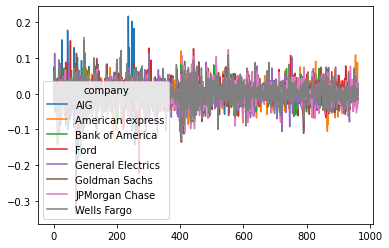

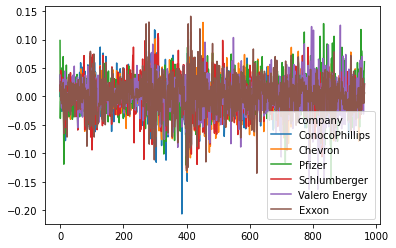

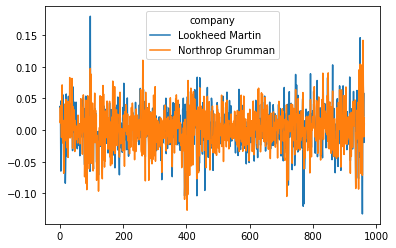

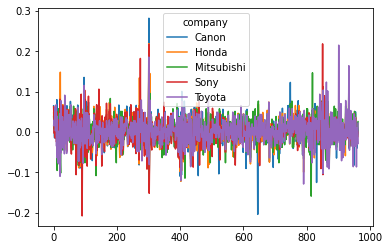

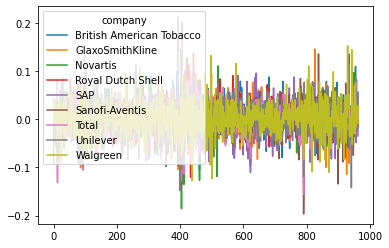

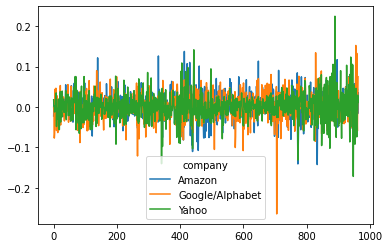

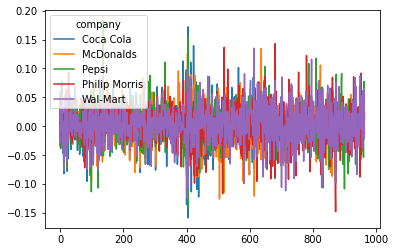

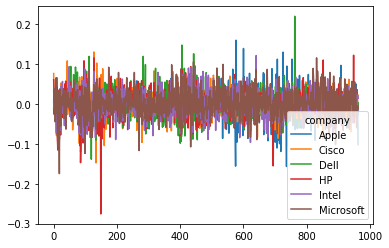

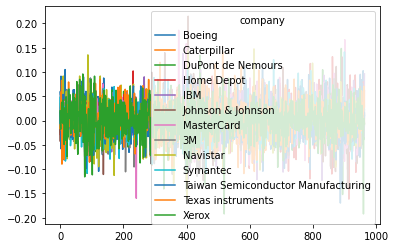

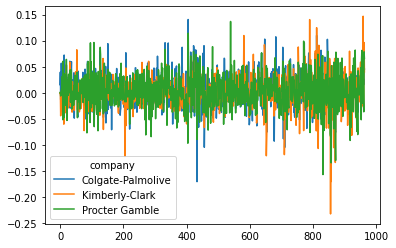

In [32]:
for i in np.sort(result.labels.unique()):
    companies_i = list(result.loc[result.labels == i,'companies'])
    dftr[dftr.index.isin(companies_i)].T.plot()